In [2]:
2+2

4

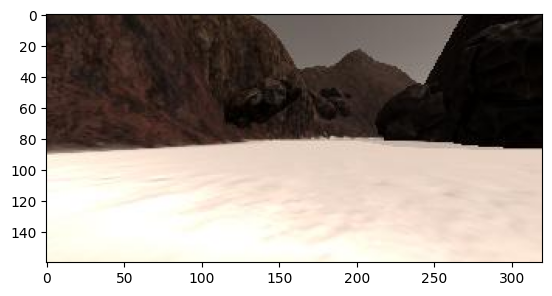

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

# read and import image

filename = "robocam.jpg"
image = mpimg.imread(filename)
plt.imshow(image)
plt.show()

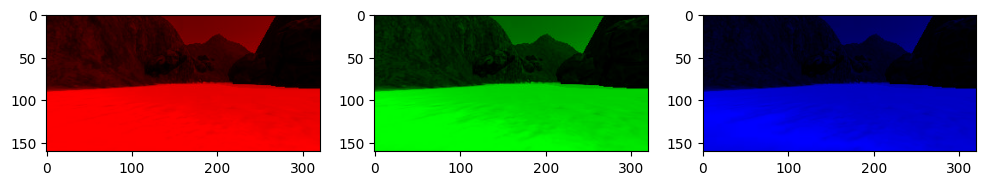

47.41483072916667 43.25189453125 40.310970052083334


In [4]:
import numpy as np
# Note: we use the np.copy() function rather than just saying red_channel = image
# because in Python, such a statement would set those two arrays equal to each other
# forever, meaning any changes made to one would also be made to the other!

filename = "robocam.jpg"
image = mpimg.imread(filename)

red_channel = np.copy(image)
green_channel = np.copy(image)
blue_channel = np.copy(image)

red_channel[:,:,[1,2]] =0 # zero out green and blue
green_channel[:,:,[0,2]] = 0 # zero out red and blue
blue_channel[:,:,[0,1]] = 0 # zero out red andgreen

fig = plt.figure(figsize=(12,3))
plt.subplot(131) #create a subplot grid with 1 row and 3 columns and activate 1st subplt
plt.imshow(red_channel)
plt.subplot(132) #create a subplot grid with 1 row and 3 columns and activate 2nd subplt
plt.imshow(green_channel)
plt.subplot(133) #create a subplot grid with 1 row and 3 columns and activate 3rd subplt
plt.imshow(blue_channel)
plt.show()

print(red_channel.mean(), green_channel.mean(), blue_channel.mean())

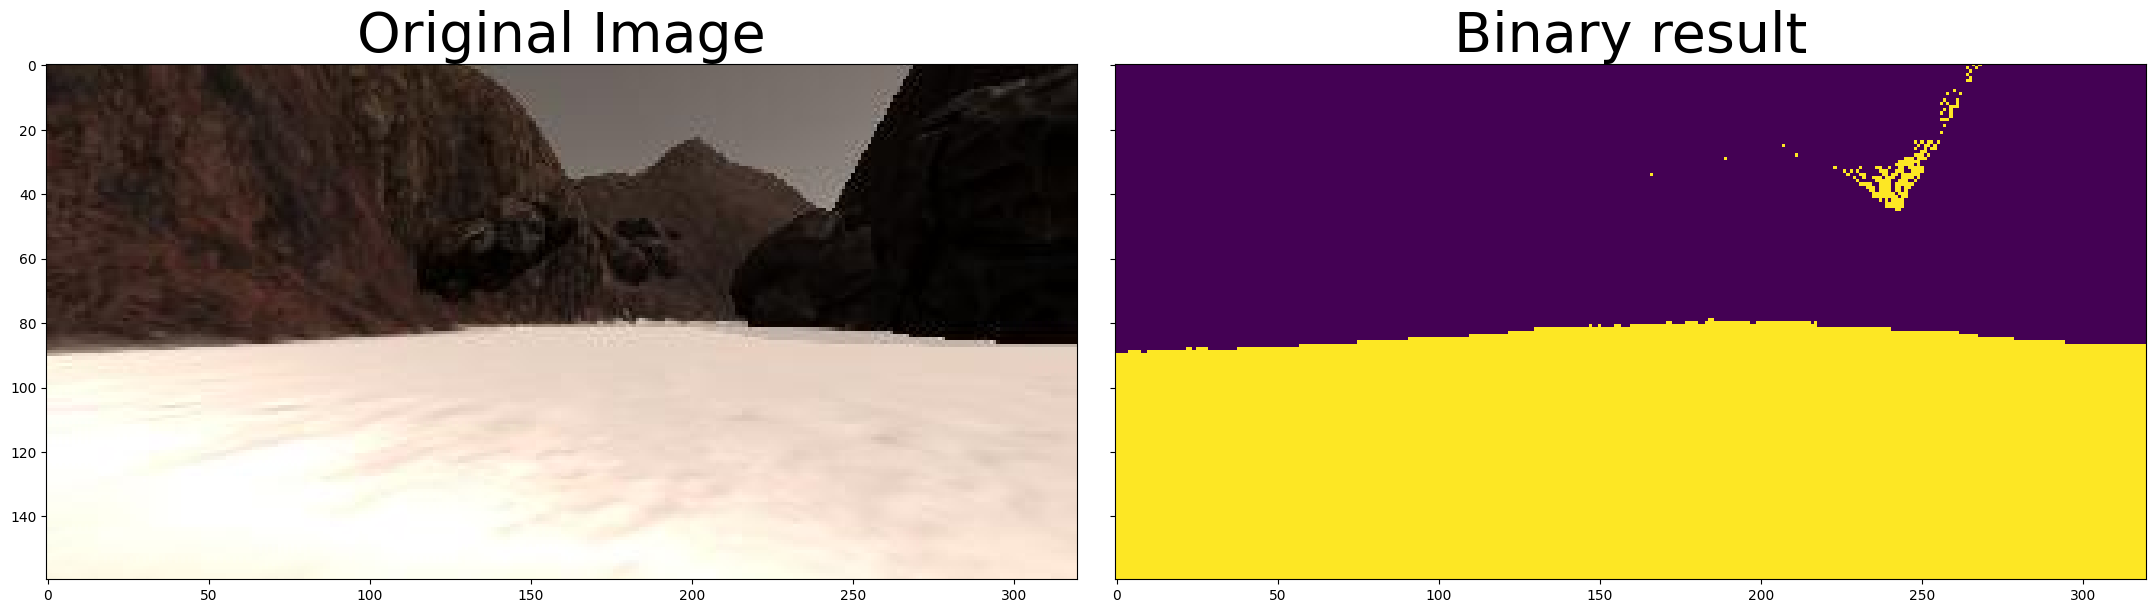

In [17]:
filename = "robocam.jpg"
image = mpimg.imread(filename)

red_thresh = red_channel.mean()
green_thresh = green_channel.mean()
blue_thresh = blue_channel.mean()
####
rgb_threshold= (round(120),round(120),round(120))

def color_thres(img, rgb_thresh=(0,0,0)):
    # Create an empty array the same size in x and y as the image 
    # but just a single channel
    binary_image = np.zeros_like(img[:,:,0])

    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                &   (img[:,:,1] > rgb_thresh[1] )\
                &   (img[:,:,2] > rgb_thresh[2])
    
    binary_image[above_thresh] = 1


    return binary_image

binary_img = color_thres(image, rgb_thresh=rgb_threshold)

#Display orignal image and binary image
f, (ax1, ax2) = plt.subplots(1,2,figsize=(21,7), sharey=True)
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize = 40)

ax2.imshow(binary_img)
ax2.set_title('Binary result', fontsize = 40)
plt.subplots_adjust(left=0, right=1, top=0.9, bottom=0.)
plt.show()